#Abstracto

El mercado de motos en Colombia está en crecimiento a pesar de la desaceleración global. La competencia se intensifica y las marcas necesitan tomar acciones informadas para mantener el ritmo.

 Para este proyecto se presenta un dataset con información relevante del mercado de motocicletas en Colombia para los ultimos dos años. El dataset incluye datos sobre las matriculas de cada marca y modelo, junto con información geográfica detallada de las ventas diarias.

  Con esta información, se busca identificar oportunidades para la venta de  motos.

#Objetivo

Hero Motos es una marca que viene perdiendo participación durante el utimo año. La empresa esta buscando mejorar su competitividad, y para esto necesita entender el mercado y las oportunidades que se presentan acorde a los productos que tiene para ofrecer.

##Preguntas hipotesis

Primera hipotesis

H0: Todos los dias se venden motos
H1: Existen dias en los que no se venden motos

Segunda hipotesis

H0: Las vendas de motos se dan todos los dias por igual
H1: Existen dias en los que se venden más motos que otros

Tercera hipotesis

H0: Las vendas de motos se concentran en pocas ciudades
H1: Las ventas de motos estan muy dispersas por todo el pais

Cuarta hipotesis

H0: Todas las marcas se venden por igual
H1: Existe preferencia por ciertas marcas

Quinta Hipotesis

H0: Todos los tipos de motos se venden por igual
H1: Existen preferencias por ciertos tipos de motos

## Preguntas de interes

A continuación planteo algunas preguntas de interés adicinales para el proyecto:

- Es posible predecir el comportamiento de las ventas del mercado, y de alguna marca en particular con base en la tendencia del mercado?

- ¿Existe correlacion directa entre la cantidad de ciudades en las que vende de una marca y las ventas?

- ¿Existe correlacion entre los precios de las motos y sus ventas?

- ¿Existe correlacion entre los precios de importacion de las motos, y sus precios finales?

#Contexto comercial

La ANDI (asociacion nacional de industriales) realiza un reporte diario de las motos nuevas que se matriculan todos los dias en el pais.

Con esta informacion se busca entender el mercado de motos en el pais, definir estrategias comerciales, predecir movimientos en precios del publico, y proyectar la demanda futura.

#Problema comercial

- Existen fechas donde se registren mas motocicletas?

- Existe preferencia por marcas?

- Existen relaciones entre las ventas de una marca, los segmentos en donde participa y las ciudades principales?

- Es posible clasificar los facotres del exito que le permiten a una marca crecer?

# Contexto analitico

Dos datasets de excel, cada uno con aproximadamente 20 columnas, con infomracion de las matriculas nuevas de los ultimos dos años: 2022-2023

In [50]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from numpy import arange
%cd '/content/drive/MyDrive'
import json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import missingno as msno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


## Bases de datos

In [2]:
# Base de daros de la indstria de motos Colombianas del 2023
co_data_23 = pd.read_excel('base Runt 2023.xlsx', sheet_name='Sheet1')
co23 = pd.DataFrame(co_data_23)

# Base de daros de la indstria de motos Colombianas del 2022
co_data_22 = pd.read_excel('base Runt 2022.xlsx', sheet_name='Hoja1')
co22 = pd.DataFrame(co_data_22)

Poner las columnas, epxlicando brevemente que son

# Data Wrangling

En primer lugar vamos a unificar las bases anuales de matriculas en un solo dataframe.

In [3]:
print(co23.columns)
print(co22.columns)

Index(['AÑO MI', 'MES MI', 'DIA MI', 'MARCA', 'MARCA COMERCIAL', 'LINEA',
       'LINEA COMERCIAL', 'MODELO', 'COLOR', 'SEGMENTO COMERCIAL',
       'CILINDRAJE', 'CILINDRAJE RANGO', 'DEPARTAMENTO', 'MINICIPIO/CIUDAD',
       'NUEVAS ZONAS', 'COMBUSTIBLE ', 'PRENDA(SI/NO)',
       'CIUDAD RESIDENCIA PROPIETARIO', 'CIUDAD DE RESIDENCIA 2', 'MATRICULA',
       'Fecha'],
      dtype='object')
Index(['AÑO MI', 'MES MI', 'DIA MI', 'CLASE', 'MARCA', 'MARCA COMERCIAL',
       'LINEA', 'LINEA COMERCIAL', 'MODELO', 'COLOR', 'SEGMENTO COMERCIAL',
       'CILINDRAJE', 'CILINDRAJE RANGO', 'DEPARTAMENTO', 'MINICIPIO/CIUDAD',
       'MINICIPIO/CIUDAD2', 'NUEVAS ZONAS', 'COMBUSTIBLE ', 'PRENDA(SI/NO)',
       'CIUDAD RESIDENCIA PROPIETARIO', 'CIUDAD DE RESIDENCIA 2', 'MATRICULA',
       'Tipo de Usuario', 'SEGMENTACION DE PRECIO'],
      dtype='object')


Existen 20 columnas comunes en los datasets. A continuación se presenta una breve explicación de las más relevantes:

Marca: nombre comercial de la marca de la motocicleta, ej: Honda, Yamaha, Suzuki, etc.

Linea: Corresponde al nombre de la motocicleta. La linea comercial es el nombre por el que es más conocido el modelo.

Modelo: Este campo corresponde al año de fabricación del modelo del vehículo, normalmente este AM está adelantado (en 2023 se venden AM 2024).

Segmento comercial: es una clasficacion interna que se le da a las motocicletas dependiendo de sus caracteristicas. Si es automatica es una scooter, si es para calle es tipo sport, si es para terreno rural es on-off por ejemplo.

Cilindraje: Este capo determina el diametro de los pistones en el motor. El cilindraje esta asociado a los segmentos en algunos casos, y entre mayor tamaño tiene mayor potencia, torque y consumo de combustible,

Departamento & Municipo/ ciudad: Este campo indica en que lugar se matriculó la motocicleta, correspode a la localizacion de la oficina de transito donde se realizo el tramite..

Ciudad propietario: es la ciudad donde vive el dueño de la motocicleta, es mas apropiado para analizar las ventas que el lugar donde se realiza el tramite porque le permite entender a los vendedores donde deben enfocar sus esfuerzos de marketing

Nuevas zonas: es una clasificacion interna para separar el pais en regiones. Este campo determina quien es el responsable del equipo comercial

Prenda: Este campo indica si la motocicleta salio a nombre d eotra entidad, ej un banco. Normalmente se usa cuando la moto esta a nombre de una empresa, o cuando se saca a credito directo con una entidad financiera.





In [4]:
co22_23 = co23.merge(co22,'outer')

<ipython-input-4-b5322ead9232>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  co22_23 = co23.merge(co22,'outer')


In [5]:
codf = pd.DataFrame(co22_23.drop(['Fecha', 'CLASE','MINICIPIO/CIUDAD2', 'Tipo de Usuario', 'SEGMENTACION DE PRECIO','CILINDRAJE RANGO','CIUDAD DE RESIDENCIA 2'], axis=1))

De acuerdo a esta informacion encontramos que el campo de cilindraje, combustible, prenda y ciudad propietario tienen valores nulos.


estos campos nulos se van a corregir a traves de un tratamiento de datos.

Para resolver el problema de CIUDAD PROPIETARIO usaremos el campo 'municipio/ciudad', asumiendo que la ciudad del propietario es igual a la ciudad donde realiza la matricula.

Para prenda se rellenara con 0

In [6]:
codf['CIUDAD RESIDENCIA PROPIETARIO'].fillna(codf['MINICIPIO/CIUDAD'], inplace=True)

codf['PRENDA(SI/NO)'].fillna('ND', inplace=True)

In [7]:
codf['fecha'] =  codf['DIA MI'].astype('string') + '/' + codf['MES MI'].astype('string') + '/' + codf['AÑO MI'].astype('string')


In [8]:
codf['fecha'] = pd.to_datetime(codf['fecha'],'ignore',1)

Con esto terminamos de analizar la base de matriculas en Colombia. A continuación se realizan unas definiciones de variables que serán utilizadas mas adelante para nuestro analisis


In [10]:
y23 = (codf['AÑO MI'] == 2023)
y22 = (codf['AÑO MI'] == 2022)

codf23 = codf[y23]
codf22 = codf[y22]

Marcas23 = codf23.groupby('MARCA COMERCIAL').count()['MATRICULA']

count_categoria = codf.groupby('fecha').count()['MATRICULA']
count_categoria2 = codf23.groupby('MES MI').count()['MATRICULA']

tabla = codf23.groupby([pd.Grouper(key='MES MI'), 'MARCA COMERCIAL']).size().unstack()

df_marcas = tabla.groupby('MES MI').sum()

Zonas = codf.groupby('NUEVAS ZONAS').count()['MATRICULA']

Market_Top_town = codf23['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Market_Top_models = codf23['LINEA'].value_counts()[:9]

Hero_sales = codf23.query("MARCA == 'HERO'")
Hero_Top_town = Hero_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Hero_Top_models = Hero_sales['LINEA'].value_counts()[:9]

Bajaj_sales = codf23.query("MARCA == 'BAJAJ'")
Bajaj_Top_town = Bajaj_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Bajaj_Top_models = Bajaj_sales['LINEA'].value_counts()[:9]

Tvs_sales = codf23.query("MARCA == 'TVS'")
Tvs_Top_town = Tvs_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Tvs_Top_models = Tvs_sales['LINEA'].value_counts()[:9]

Suzuki_sales = codf23.query("MARCA == 'SUZUKI'")
Suzuki_Top_town = Suzuki_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Suzuki_Top_models = Suzuki_sales['LINEA'].value_counts()[:9]

Yamaha_sales = codf23.query("MARCA == 'YAMAHA'")
Yamaha_Top_town = Yamaha_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Yamaha_Top_models = Yamaha_sales['LINEA'].value_counts()[:9]

Honda_sales = codf23.query("MARCA == 'HONDA'")
Honda_Top_town = Honda_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Honda_Top_models = Honda_sales['LINEA'].value_counts()[:9]


# Exporatory data analysis

## Ventas diarias, por mes (2020-2023)


<Axes: xlabel='DIA MI', ylabel='MES MI'>

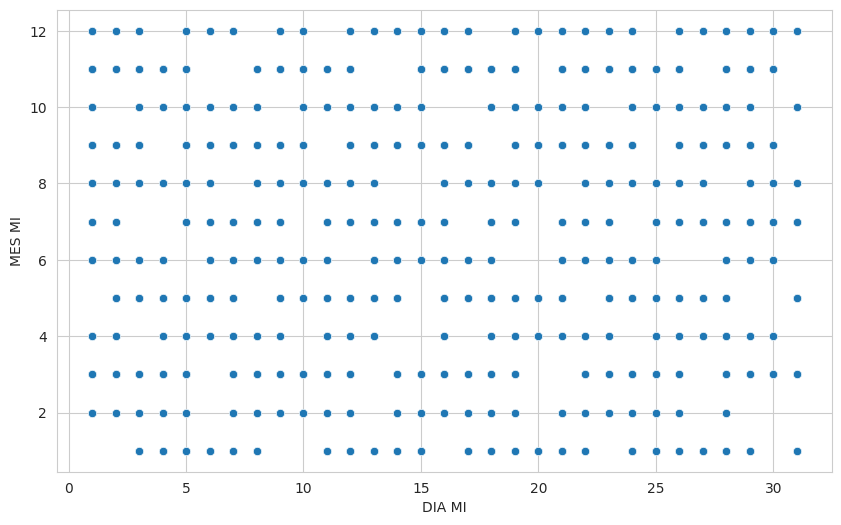

In [48]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data=co22, y="MES MI", x="DIA MI", ax = ax)

De acuerdo a este primer grafico, casi todos los dias se registran matriculas de motos nuevas. Existen algunas fechas en las que no se observan registros. Al revisar el calendario encontramos que esos vacios se presentan los domingos y festivos, y se puede concluir que esto se debe a que las oficinas de transito estan cerradas normalmente en esos dias.

Distribución de las matriculas por dia

<Axes: >

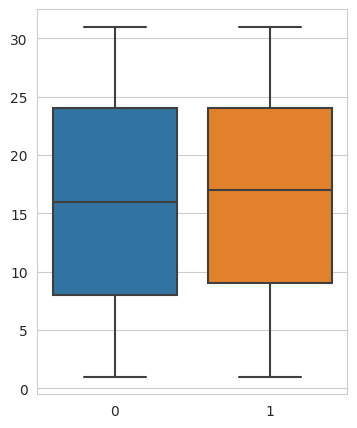

In [47]:
fig, ax = plt.subplots(figsize = (4, 5))
sns.boxplot([codf22['DIA MI'], codf23['DIA MI']])

De acuerdo a este grafico se pude observar que las medianas están por encima del 15 del mes lo que indica que las ventas se dan más hacia fin de mes que a principios. Esta tendencia es aun más fuerte en el 2023 (Gráfico naranja) vs el año anterior

Ventas de motos diarias Colombia

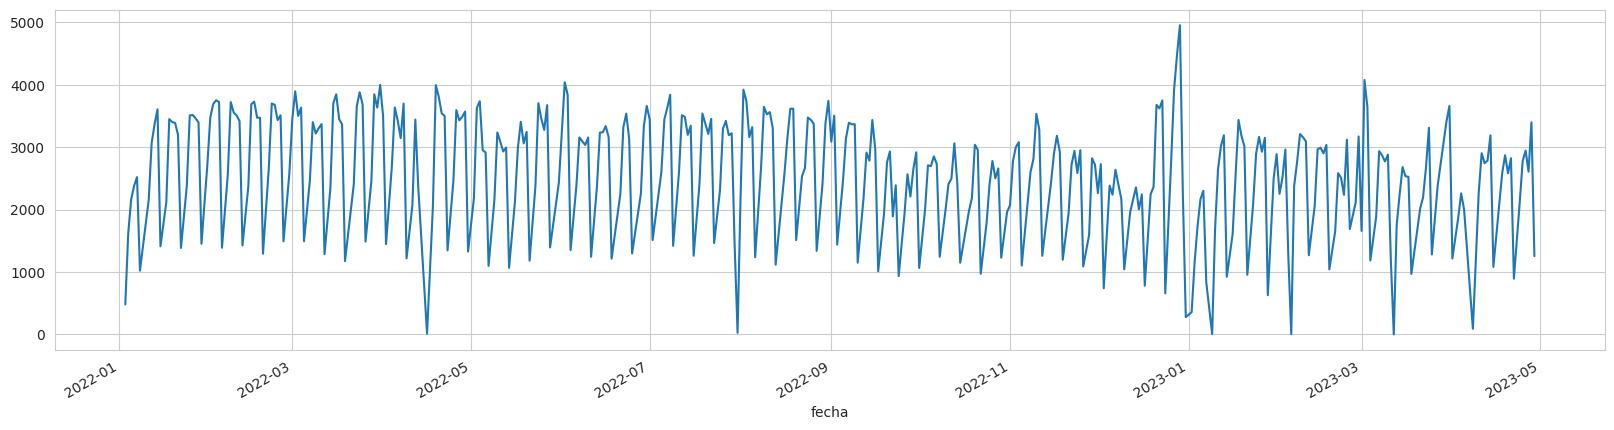

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria.plot(ax = ax)
plt.show()

En este grafico se observa que las ventas diarias tienen cierta volatilidad. Para el 2022 los datos oscilaban entre 1500 y 4000 motos diarias, mientras que en el 2023 se observa un rango que va de 1000 a 3000.

Con esta informacion podemos concluir que en lo que va de este año las ventas de motos presentan una disminucion en sus registros diarios.


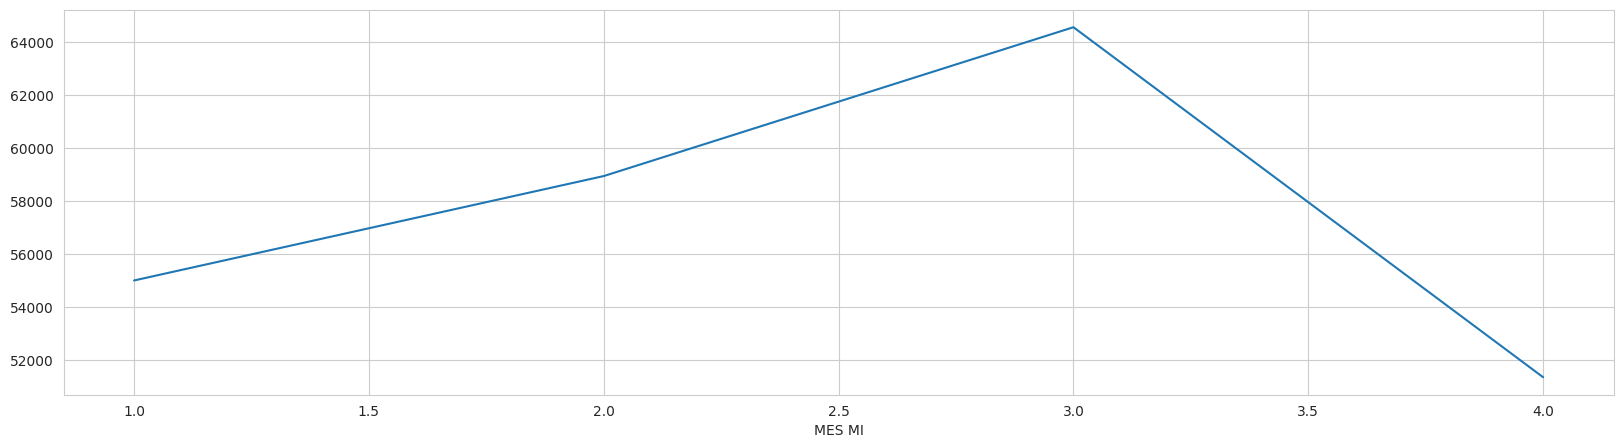

In [52]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = codf23.groupby('MES MI').count()['MATRICULA']

count_categoria2.plot(ax = ax)
plt.show()

En este segundo grafico del mercado, enfocado unicamente en el 2023 se observa una disminucion fuerte en la tendencia de crecimiento en el mes de abril. Esta caida en las ventas se debe principalmente a la semana santa, que fue practicamente una semana donde las ventas se redujeron considerablemente.

## Analisis general del mercado

<Axes: >

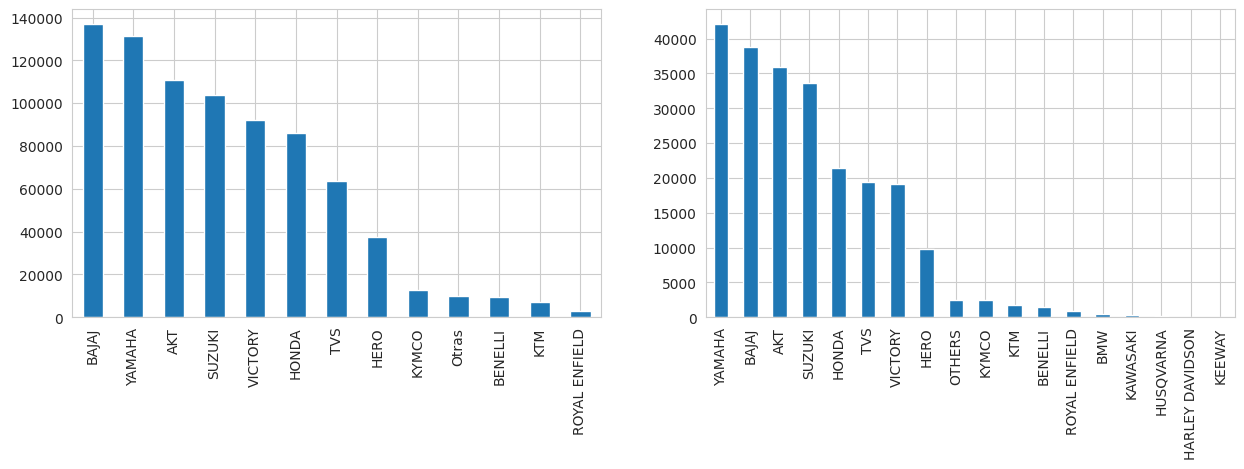

In [59]:
fig, ax= plt.subplots(1,2,figsize = (15,4))
codf22['MARCA COMERCIAL'].value_counts().plot.bar(ax = ax[0])
codf23['MARCA COMERCIAL'].value_counts().plot.bar(ax = ax[1])

En este grafico de pie se observa que la mayor parte del mercado lo tiene Bajaj y Yamaha, las marcas lideres en ventas del mercado, seguidas por AKT, Suzuki y Honda.

## Analisis temporal de las marcas

<Axes: xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

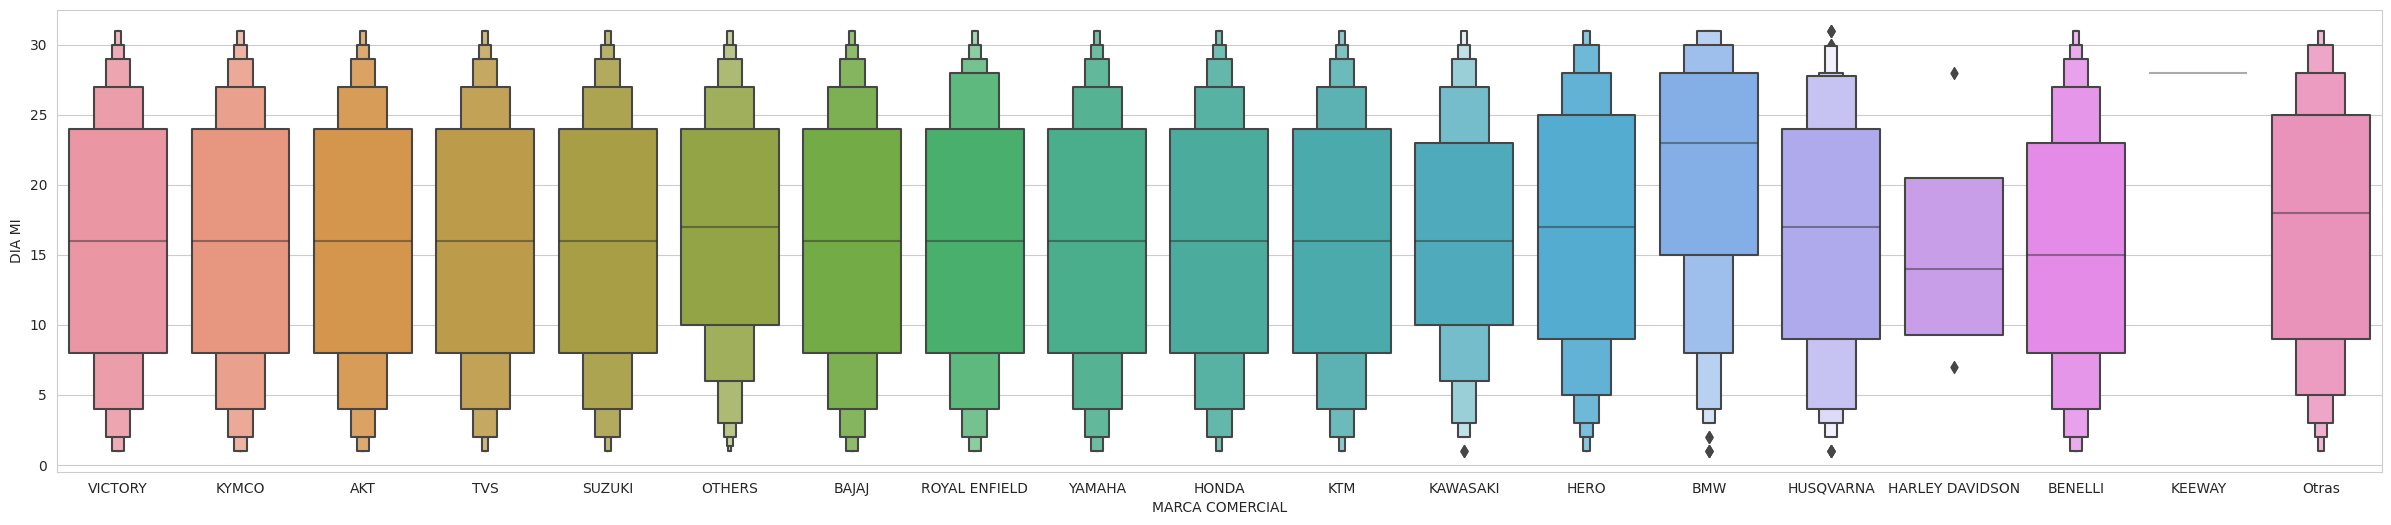

In [77]:
fig, ax= plt.subplots(figsize = (30,6))
sns.boxenplot(data=codf, x='MARCA COMERCIAL', y="DIA MI")

Al revisar la distrubión de los datos por dia, en el 2023, se puede observar que en general las marcas realizan la mayoría de sus matriculas después del 15 del mes. En particular llama la atención los quertiles superiores de hero, que muestran que la marca tiene una mayor proporción de sus ventas a final de mes frente a otras marcas como Bajaj y Yamaha

## Analisis de marca por geografias

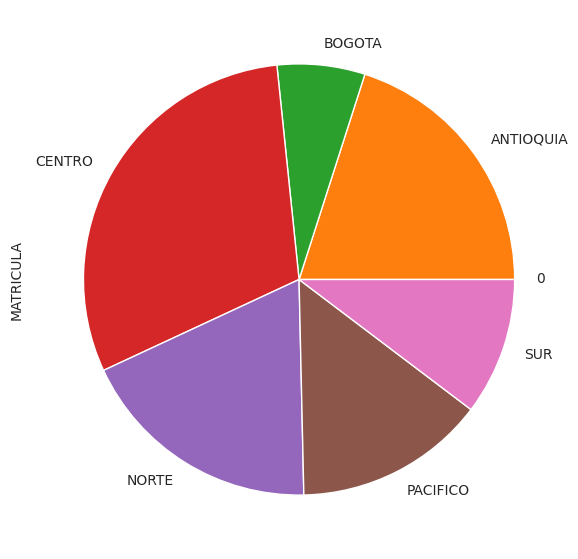

In [78]:
fig,ax= plt.subplots(figsize = (10,7))
Zonas.plot.pie()
plt.show()

Analisis: La zona centro es la mas representativa en cuanto a la venda de motos, seguida por Antioquia y Centro en tercer lugar.

En este punto se empieza a evidenciar que viertas zonas del pais tienen mayor concentracion de las ventas

<Axes: >

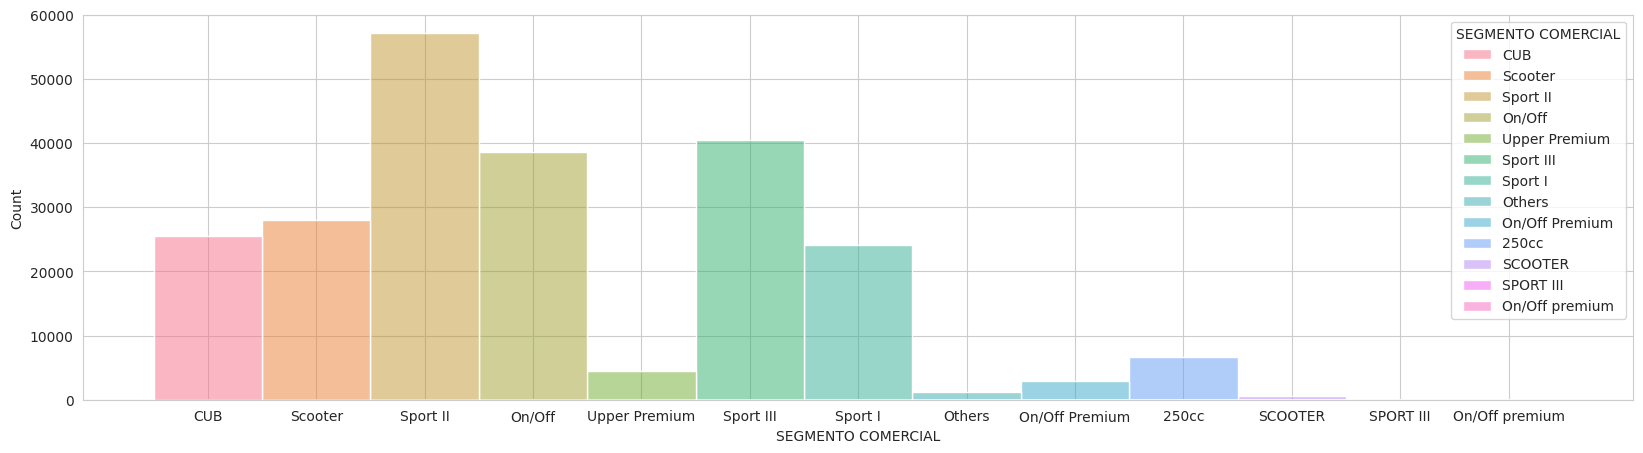

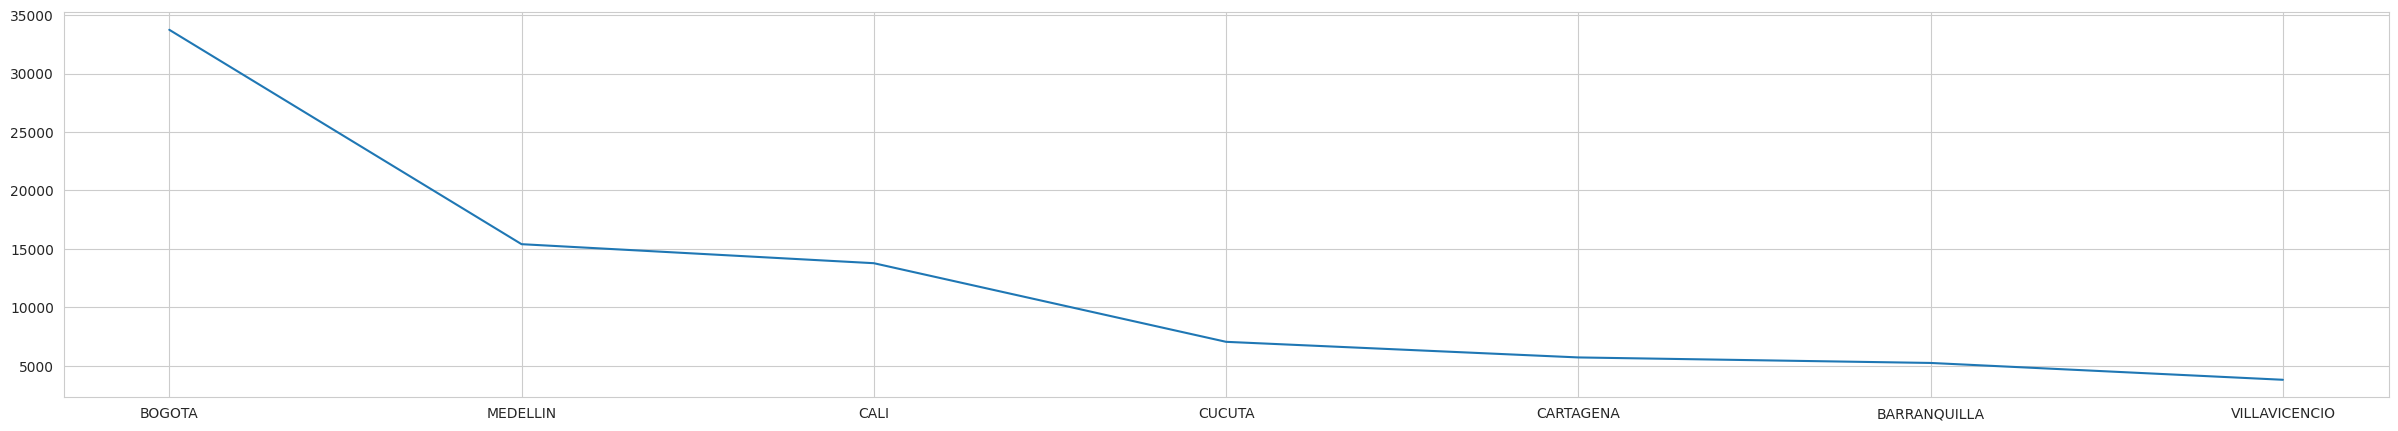

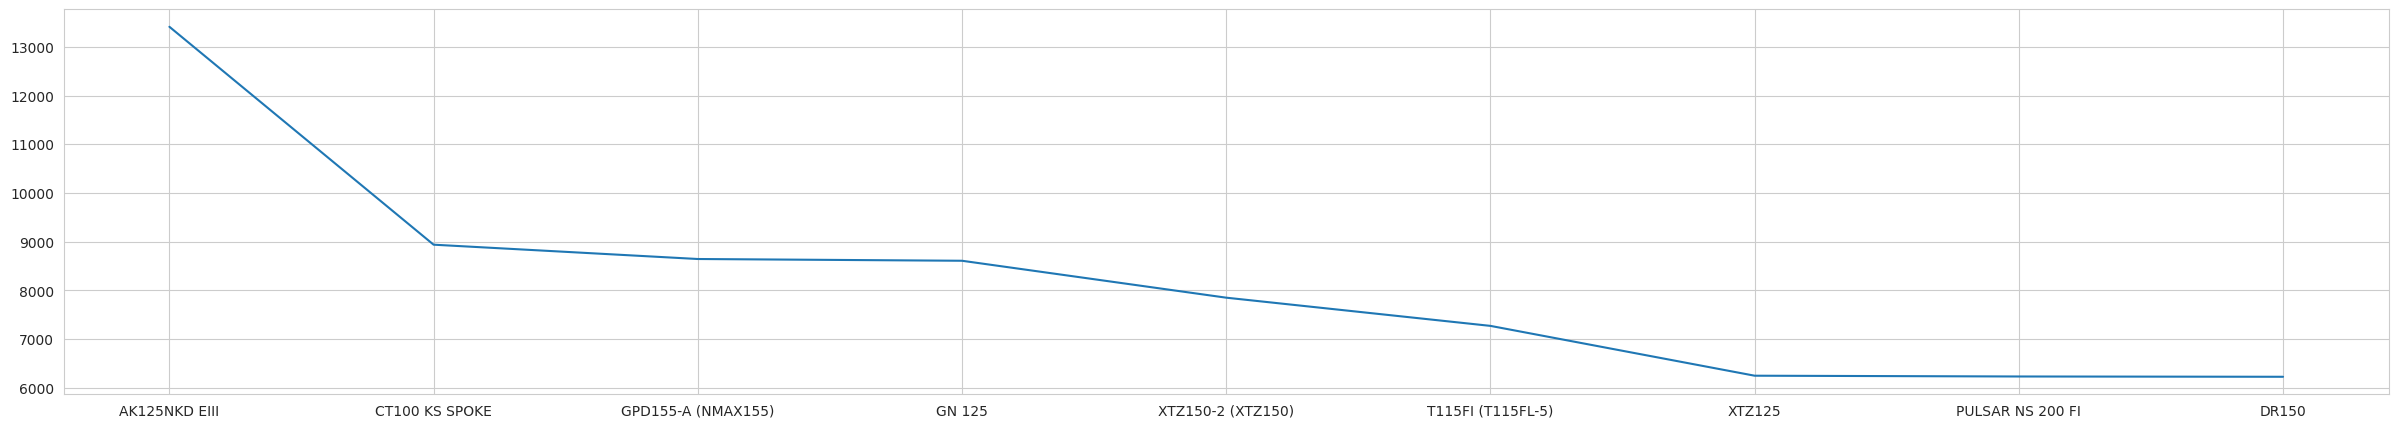

In [79]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data=codf23, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (30,5))
Market_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (30,5))
Market_Top_models.plot(ax = ax)

Las ciudaes más representativas del mercado son Bogotá (Capital de Colombia), Medelin, Cali, Cucuta, Cartagena, Barrranquilla y Monteria.

A nivel de modelos (referencias de motocicletas), la Más vendida en Colombia es la NKD125 de AKT, seguida porla Nmax de Yamaha y la Boxer CT100 de Bajaj. De estos tres modelos resalta la Nmax, una motocicleta con un precio mucho mnayor a las otras dos, y sin embargo maneja los mismos volúmenes de una de las motos más economicas del mercado, la Boxer CT100


<Axes: >

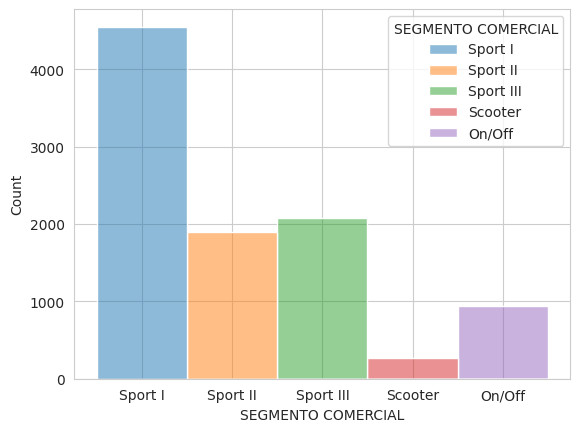

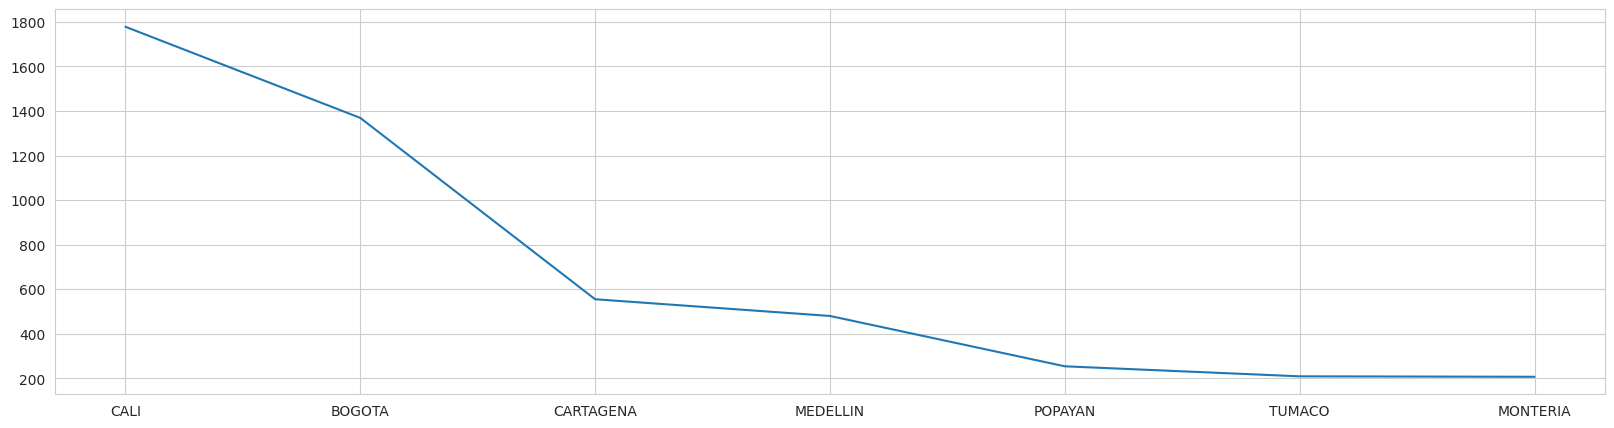

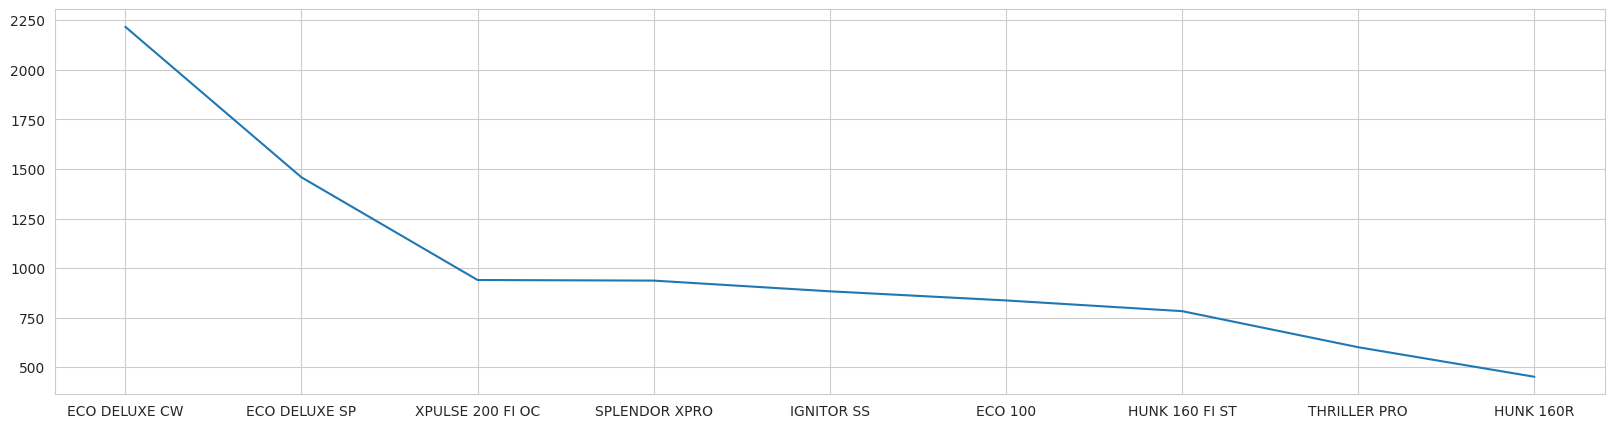

In [80]:

sns.set_style("whitegrid")
sns.histplot(data=Hero_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))

Hero_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))

Hero_Top_models.plot(ax = ax)


La marca Hero tiene la mayoría de sus ventas en el segmento Sport I, el más económico del mercado (motos de trabajo). A nivel de ciudad se observa que, a diferencia del mercado, Cali es la ciudad más importante para esta marca, seguida por Bogotá (la que más motos vende en el mercado).

Los modelos más representativos para la marca son la Eco Deluxe en sus dos versiones (CW, SP), seguido por la Xpulse 200 y la Ignitor que estan en el mismo nivel de ventas

<Axes: >

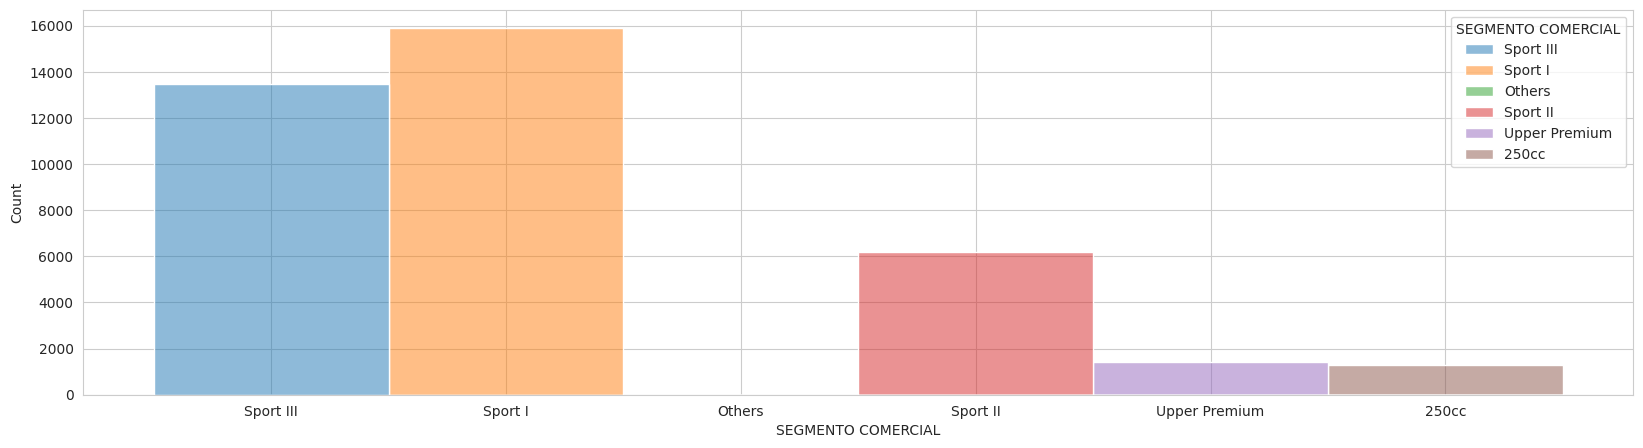

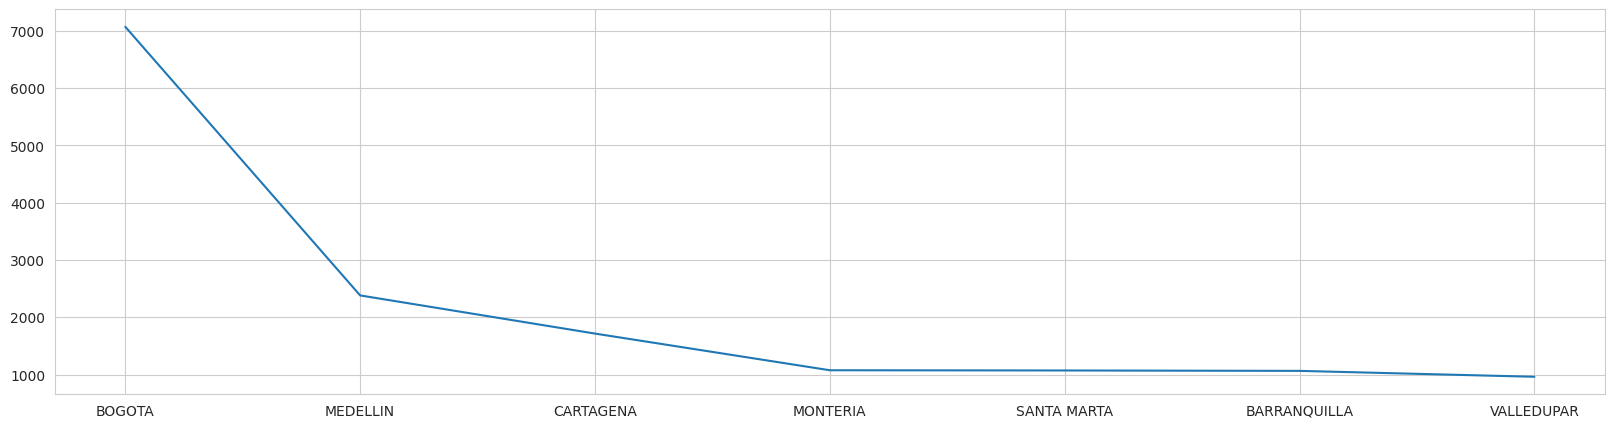

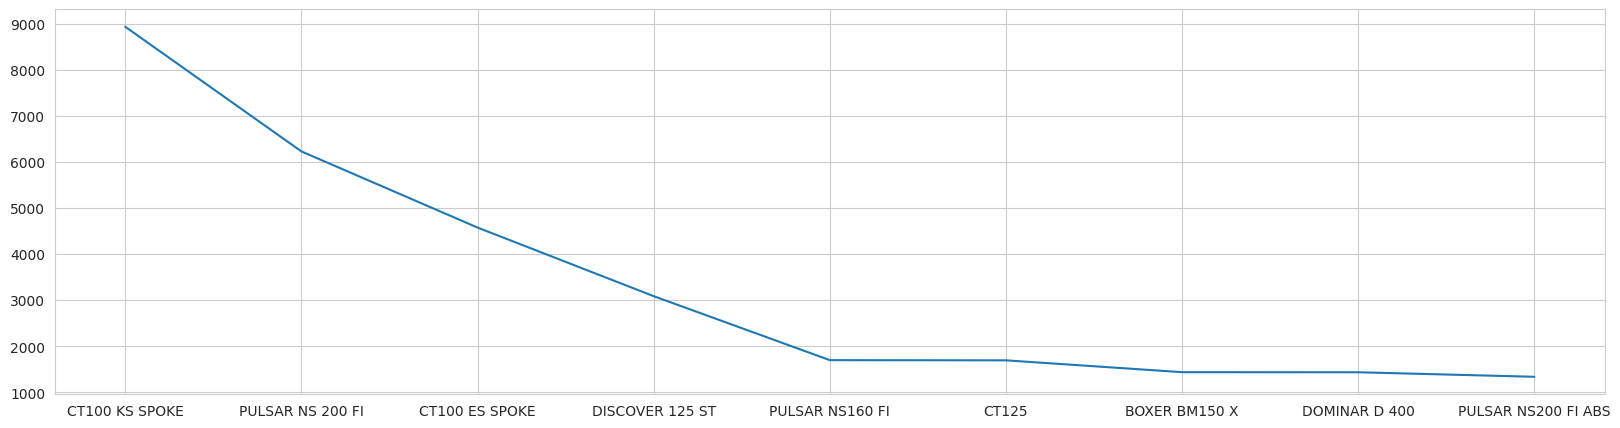

In [81]:
fig, ax = plt.subplots(figsize = (20,5))
sns.histplot(data=Bajaj_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))

Bajaj_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))

Bajaj_Top_models.plot(ax = ax)

Bajaj, la marca lider de mercado tiene motos en solo 3 segmentos. El segmento Sport I es donde mas motos vende, con sus modelos de 100CC, (Boxer) seguido por sus modelos Sport III, prinicipalmente en el ilindraje de 200cc.

Los modelos más representativos de Bajaj son la Ct100 KS, seguido por la Pulsar 200 y la CT100 ES.

El top 5 de ciudades donde mas se venden motocicletas son Bogota, Medellin,Cartagena y Montería. De sus 7 ciudades más improtantes, 5 estan en la zona norte (Costa) del país.

<Axes: >

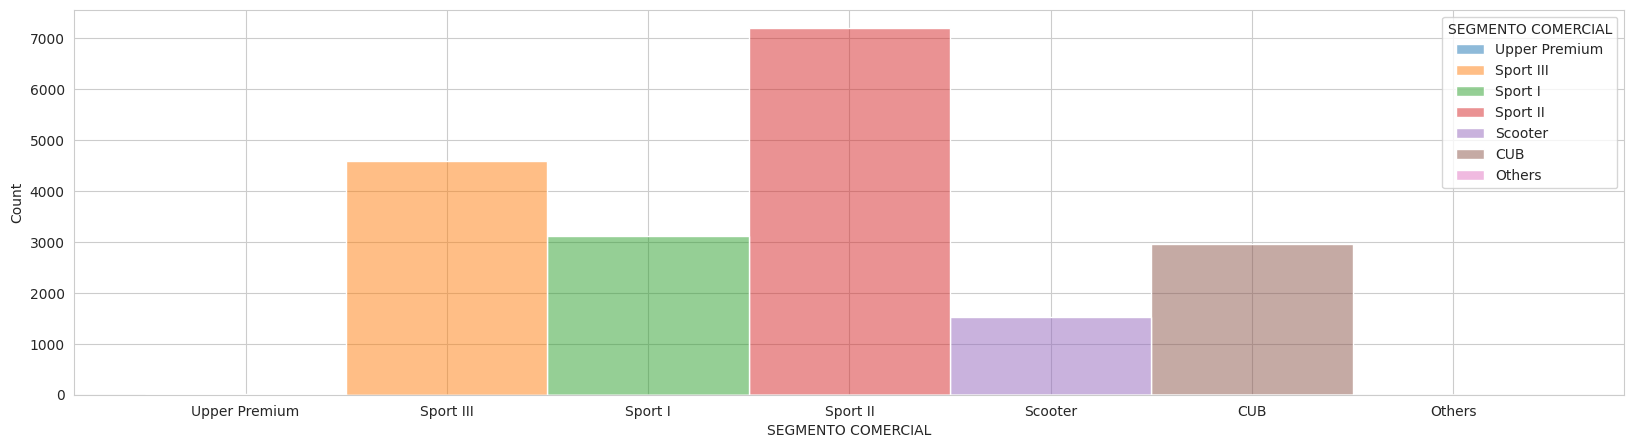

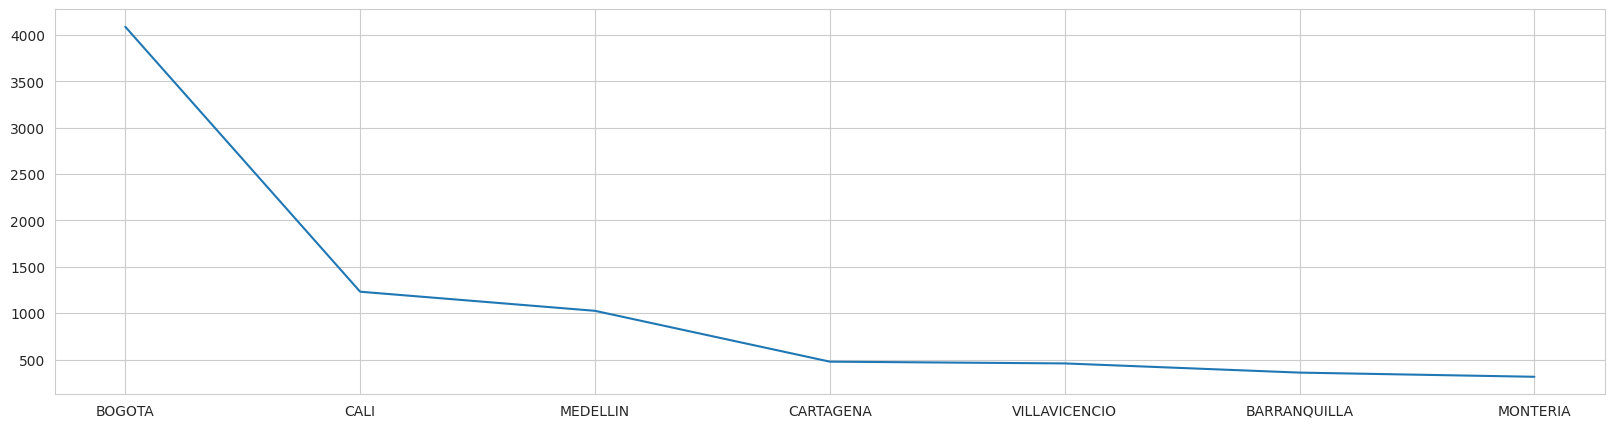

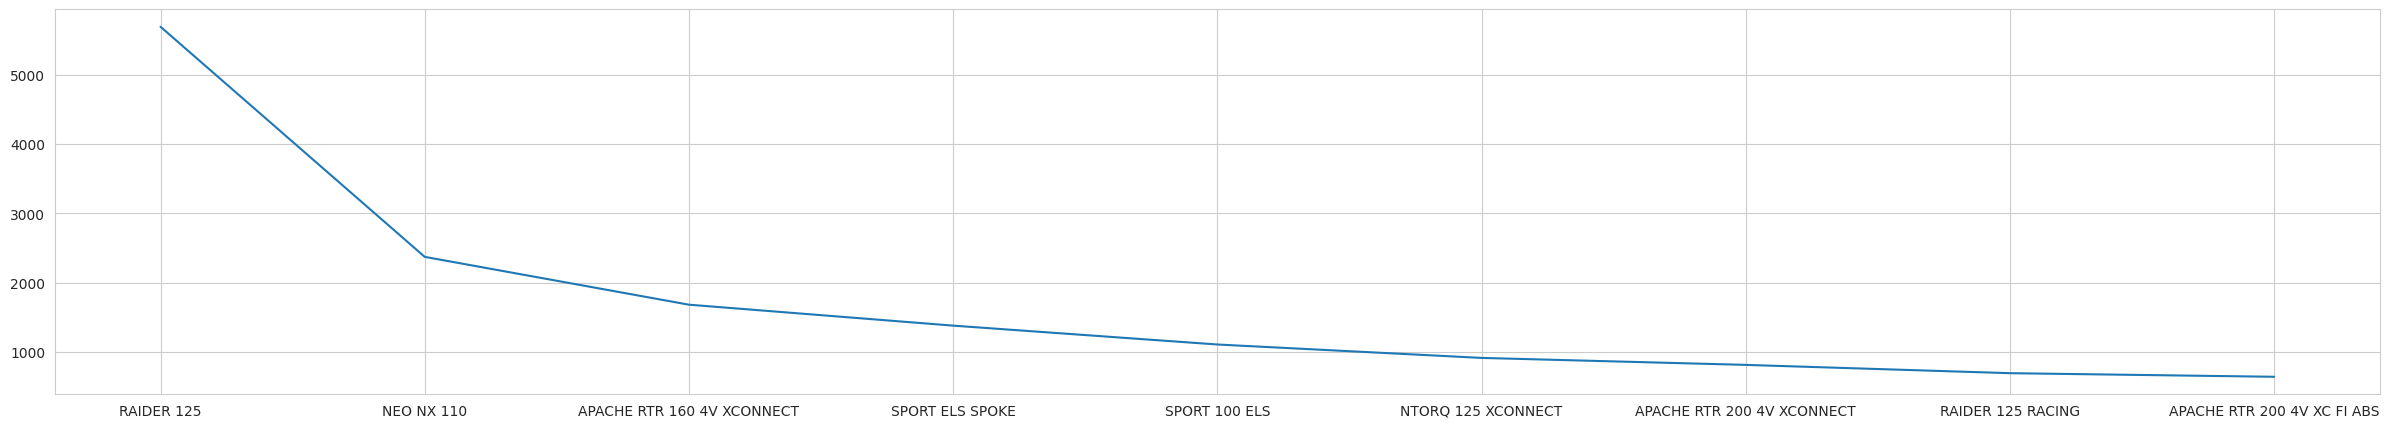

In [82]:
fig, ax = plt.subplots(figsize = (20,5))
sns.histplot(data=Tvs_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Tvs_Top_town.plot(ax = ax)
fig, ax = plt.subplots(figsize = (30,5))
Tvs_Top_models.plot(ax = ax)

TVS es una marca con una gran participación en el segmento Sport II, gracias al resultado de la Raider 125 (su motocicleta más vendida actualmente).

a nivel de ventas por ciudad se observa que Bogotá es su plaza más importante, seguida por Cali y Medellín, las tres ciudades más importantes a nivel de mercado.

##Segmentos:

<Axes: xlabel='count', ylabel='SEGMENTO COMERCIAL'>

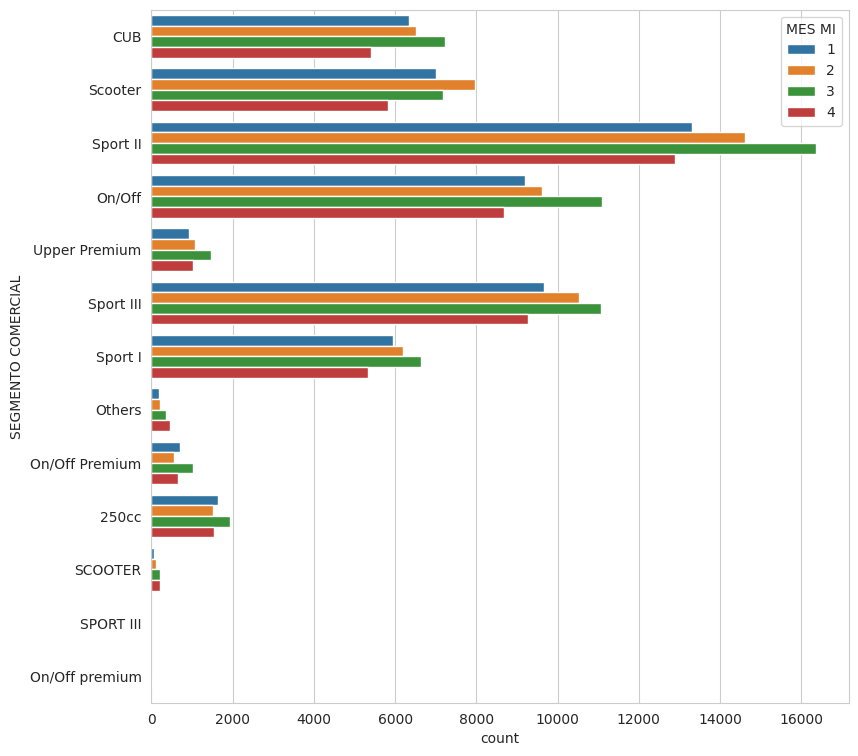

In [83]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.countplot(y= codf23['SEGMENTO COMERCIAL'], hue = codf23['MES MI'],ax = ax)

Analisis: En lo que va del año se puede observar que los segmentos Sport II y Sport III son los más representativos en ventas. En febrero se observa un incremetno en las ventas de la mayoría de segmentos, a excepción de CUB y Sport I que mantienen volumenes muy cercanos a los del mes pasado.

Como complemento, quiero resaltar que estos dos segmentos son los más económicos del mercado, lo que refleja la situación económica complciada para los usuarios que buscan motos más baratas.


<Axes: xlabel='SEGMENTO COMERCIAL', ylabel='DIA MI'>

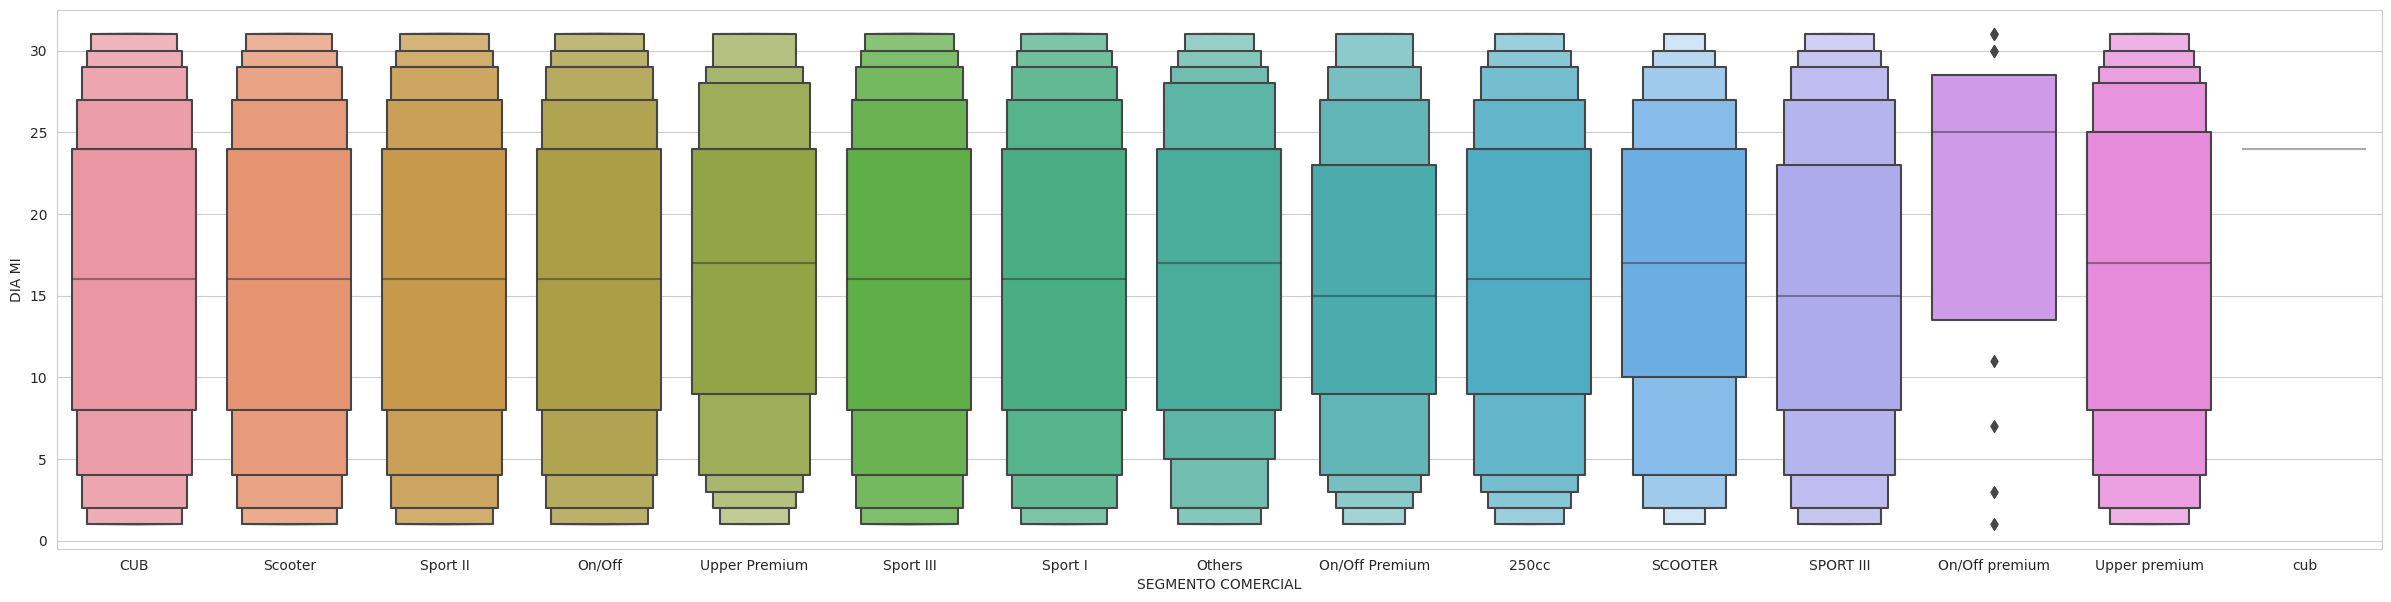

In [84]:
fig, ax= plt.subplots(figsize = (30,7))
sns.boxenplot(data=codf, x='SEGMENTO COMERCIAL', y="DIA MI", scale="linear")

En este gráfico se puede observar la distribución por dias de las ventas por segmento, y permite entender si algun segmento tiene alguna distribución diferente en el mes. De manera preliminar se puede observar que el segmento Sport I parece tener concentrada la mayorúa de sus ventas un poco más hacia el final del mes que el resto de segmentos, al igual que las motocicletas on/Off y las CUB.

# Conclusiones

En primer lugar se puede observar que las ventas no ocurren todos los días, además, se evidencia que durante los últimos días del mes se venden más motos en comparación con los primeros, lo que sugiere la necesidad de implementar acciones específicas de ventas y marketing para esos días.

En cuanto a los segmentos de mercado, se destaca que los segmentos Sport II y Sport III son los más representativos en ventas, mientras que los segmentos CUB y Sport I mantienen volúmenes cercanos. Estos dos últimos son los segmentos más económicos del mercado, lo que sugiere una situación económica difícil para los consumidores que buscan motocicletas más baratas.

En términos de las marcas más importantes, Yamaha y Bajaj lideran el mercado, seguidas por AKT, Suzuki y Honda. Las ciudades más representativas del mercado son Bogotá, Medellín, Cali, Cúcuta, Cartagena, Barranquilla y Montería. Además, la AKT NKD125 es la motocicleta más vendida en Colombia, seguida por la Yamaha Nmax y la Bajaj Boxer CT100.

Cada marca tiene una presencia diferencial en diferentes segmentos de mercado y ciudades. Por ejemplo, la marca Hero tiene la mayoría de sus ventas en el segmento Sport I, el más económico del mercado, y en la ciudad de Cali. En contraste, Suzuki tiene una gran distribución de ventas en Bogotá y Cúcuta, mientras que Yamaha tiene una participación en todos los segmentos y una plaza más importante en Medellín.

En cuanto a la distribución geográfica, se destaca que la zona Bogota (centro) es la más representativa en cuanto a la venta de motocicletas, seguida por Antioquia (Donde está Medellín).

En resumen, el análisis de los datos permite observar las tendencias del mercado de motocicletas en Colombia, las preferencias de los consumidores y las estrategias que podrían aplicar las empresas para mejorar sus ventas. Es importante tener en cuenta las diferencias geográficas, los segmentos de mercado y los modelos más populares para adaptar las estrategias de marketing y ventas a las necesidades del mercado.